In [209]:
import numpy as np
import matplotlib.pyplot as plt
import shapely

m1 = np.array([-1,1])
m2 = np.array([2,4])
m3 = np.array([-2,2])

S = np.array([[1,0],[0,1]])
#print(c1)
#rozklad normalny 
X1, Y1 = np.random.multivariate_normal(m1,S,(30)).T
X2, Y2 = np.random.multivariate_normal(m2,S,(30)).T
X3, Y3 = np.random.multivariate_normal(m3,S,(30)).T
#print("X1: ",X1)
#print("Y1: ",Y1)
#print(X1.ndim)

In [115]:
#transponowanie macierzy
m1_trans = np.transpose(m1)
m2_trans = np.transpose(m2)
m3_trans = np.transpose(m3)

#liczność klas
n1 = len(X1)
n2 = len(X2)
n3 = len(X3)

#suma elementów n  
n = n1 + n2 + n3

#liczba klas g
g = 3

#średnia wszystkich klas
m_x = np.concatenate((X1,X2,X3))
mean_x = np.mean(m_x)
m_y = np.concatenate((Y1,Y2,Y3))
mean_y = np.mean(m_y)
m = np.array([mean_x,mean_y])
m_trans = np.transpose(m)
print(m_trans)

[-1  1]
[-0.34258809  2.57053393]


In [114]:
# Wyznaczenie macierzy zmienności wewnątrzgrupowej W
W = (1/(n-g)) * (n1*(n1-1)*S + n2*(n2-1)*S + n3*(n3-1)*S)
print(W)

[[30.  0.]
 [ 0. 30.]]


In [133]:
#Wyznaczenie macierzy zmienności międzygrupowej B
B = (np.outer((n1 * (m1_trans - m_trans)) , (m1_trans - m_trans).transpose()) + np.outer((n2 * (m2 - m)) , (m2 - m).transpose())
+ np.outer((n3 * (m3_trans - m_trans)) , (m3_trans - m_trans).transpose())) / (g - 1)

print(B)

[[130.00385427  79.90121447]
 [ 79.90121447  72.53188545]]


In [151]:
#Pomocniczy wektor U 
W_1 = np.linalg.inv(W)
U = [[0,0],
     [0,0]]

for i in range(len(W_1)):
   # iteracja po kolumnach B
   for j in range(len(B[0])):
       # iteracja po wierszach B
       for k in range(len(B)):
           U[i][j] += W_1[i][k] * B[k][j]

for r in U:
   print(r)

[4.333461809138052, 2.6633738157219184]
[2.6633738157219184, 2.4177295149185785]


In [205]:
#Wyznaczam wartości własne
lamb = np.linalg.eigvals(U)
print(np.max(lamb))
print(lamb)
a = lamb[0]/lamb[1]

6.205978611039276
[6.20597861 0.54521271]


In [224]:
#Rzutowanie 
def rzutowanie(x,y,a):
    X_z = (y * a + x)/(a**2 + 1) 
    Y_z = a * X_z
    return np.array([X_z,Y_z])

In [233]:
x1_pro = rzutowanie(X1,Y1,a)
x2_pro = rzutowanie(X2,Y2,a)
x3_pro = rzutowanie(X3,Y3,a)


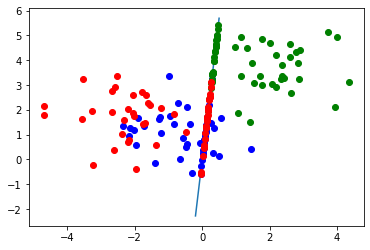

In [236]:
#Wykres z kierunkiem a 
plt.plot(X1,Y1,"ro",color = 'blue')
plt.plot(X2,Y2,"ro",color = 'green')
plt.plot(X3,Y3,"ro",color = 'red')
x = np.linspace(-0.2,0.5)
plt.plot(x,x*a)
plt.plot(x1_pro[0],x1_pro[1],"ro", color = 'blue')
plt.plot(x2_pro[0],x2_pro[1],"ro", color = 'green')
plt.plot(x3_pro[0],x3_pro[1],"ro", color = 'red')
plt.show()